In [8]:
import numpy as np
from simpful import *
import matplotlib.pyplot as plt

In [9]:
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



## Define Inputs and Output
1. Inputs
- Number of Cars
- Number of Pedestrians
- Hours of the day
- Week-end or Week 
2. Output
- Duration of the car green light

In [10]:
# Define fuzzy sets and linguistic variables 

np_low = FuzzySet(function=Trapezoidal_MF(0, 0, 7, 10), term = "low")
np_average = FuzzySet(function=Trapezoidal_MF(8, 12, 17, 20), term = "average")
np_high = FuzzySet(function=Trapezoidal_MF(18, 25, 30, 30), term = "high")
FS.add_linguistic_variable("nb_pd",LinguisticVariable([np_low, np_average, np_high], concept ="Number of Pedestrian", universe_of_discourse=[0,30]))

nc_low = FuzzySet(function=Trapezoidal_MF(0, 0, 10, 15), term = "low")
nc_average = FuzzySet(function=Trapezoidal_MF(10, 15, 25, 30), term = "average")
nc_high = FuzzySet(function=Trapezoidal_MF(25, 40, 60, 60), term = "high")
FS.add_linguistic_variable("nb_car",LinguisticVariable([nc_low, nc_average, nc_high], concept = "Number of Car in the last 5 minutes", universe_of_discourse=[0,60]))

h_night = FuzzySet(function=Trapezoidal_MF(0,0,6,7), term = "night")
h_morningpeak = FuzzySet(function=Trapezoidal_MF(6.5, 7, 9, 10), term = "morningpeak")
h_offpeak = FuzzySet(function = Trapezoidal_MF(9.5, 10.5, 16, 17), term = "offpeak")
h_afpeak = FuzzySet(function= Trapezoidal_MF(16.5, 17, 19,20), term = "afpeak")
h_evening = FuzzySet(function = Trapezoidal_MF(19.5, 20.5, 24, 24), term = "evening")
FS.add_linguistic_variable("day_hour", LinguisticVariable([h_night, h_morningpeak, h_offpeak, h_afpeak, h_evening], concept="Hour of the day", universe_of_discourse=[0,24]))

week = FuzzySet(function=Trapezoidal_MF(1,1,5,6), term = "week")
weekend = FuzzySet(function=Trapezoidal_MF(5,6,7,7), term = "weekend")
FS.add_linguistic_variable("week_day", LinguisticVariable([week, weekend], concept="Week or Weekend", universe_of_discourse=[1,7]))

#Define output
gl_short = FuzzySet(function=Trapezoidal_MF(5, 5, 10,15), term = "Short green light duration")
gl_medium = FuzzySet(function=Trapezoidal_MF(12,16,30,35), term = "Medium green light duration")
gl_long = FuzzySet(function=Trapezoidal_MF(32,36,60,60), term = "Long green light duration")
FS.add_linguistic_variable("gl_duration", LinguisticVariable([gl_short, gl_medium, gl_long], concept = "Green light duration", universe_of_discourse=[5,60]))

<AxesSubplot: xlabel='Green light duration', ylabel='Membership degree'>

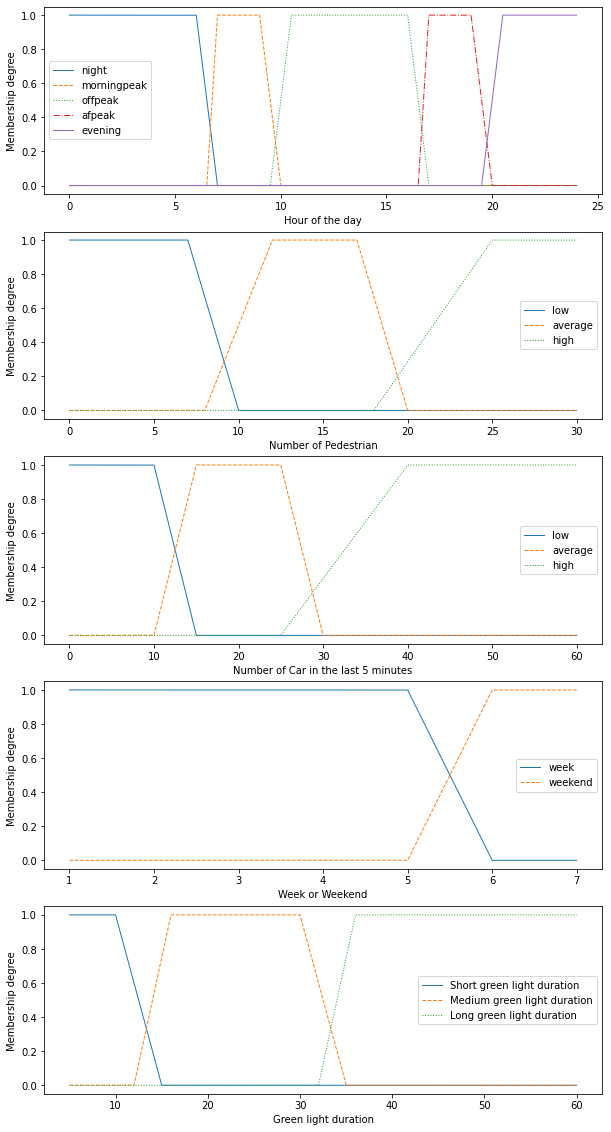

In [11]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, figsize=(10,20))

FS.plot_variable("day_hour",ax = ax1)
FS.plot_variable("nb_pd",ax = ax2)
FS.plot_variable("nb_car",ax = ax3)
FS.plot_variable("week_day",ax = ax4)
FS.plot_variable("gl_duration",ax = ax5)

In [12]:
R1 = "IF (nb_car IS low) OR (nb_pd IS high) THEN (gl_duration IS low) WEIGHT 1.0" 
R2 = "IF (nb_car IS high) OR (nb_pd IS low) THEN (gl_duration IS long) WEIGHT 0.8" #priority to pd
R3 = "IF (nb_car IS low) AND ((day_hour IS morningpeak) OR (day_hour IS afpeak)) THEN (gl_duration IS average) WEIGHT 0.7" #still peak hour so try to keep fluid traffic
R4 = "IF (week_day IS weekend) AND (day_hour IS morningpeak) THEN (gl_duration IS average) WEIGHT 1.0" #no morning peak on weekend
R5 = "IF (day_hour IS night) AND (NOT(nb_pd IS high)) THEN (gl_duration IS long) WEIGHT 1" 
R6 = "IF ((day_hour IS morningpeak) OR (day_hour is afpeak)) AND (week_day IS week) THEN (gl_duration IS long) WEIGHT 1.0"

FS.add_rules([R1, R2, R3, R4, R5])

In [13]:
FS.set_variable("nb_pd", 1)
FS.set_variable("nb_car", 2)
FS.set_variable("day_hour", 1)
FS.set_variable("week_day", 3)

In [14]:
print(FS.Mamdani_inference(["gl_duration"]))

{'gl_duration': 46.98811240652679}
